In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matplotlib import colors
import math

In [2]:
EARTH_RADIUS = 6371000
EARTH_MASS = 5.9722E24
G = 6.6743E-11

EARTH_VOLUME = math.pi*4/3*EARTH_RADIUS*EARTH_RADIUS*EARTH_RADIUS;
EARTH_DENSITY = EARTH_MASS/EARTH_VOLUME

SPACE_X = EARTH_RADIUS*4
SPACE_Y = EARTH_RADIUS*2

IMG_X = 512
IMG_Y = int(IMG_X / SPACE_X*SPACE_Y)

In [3]:
PARTS=2048
delta2 = EARTH_RADIUS/PARTS
delta = delta2*2
print(f'PARTS={PARTS} delta={delta} delta2={delta2}')

def calcG(distFromCenter) :
    A = 0

    total_V=0
    xVol=0

    x = -EARTH_RADIUS+delta2
    while x<=EARTH_RADIUS-delta2:
    #while x<=0-delta2: #hemisphere
        k = x-distFromCenter;
        
        max_Y = math.sqrt(EARTH_RADIUS*EARTH_RADIUS - x*x)
        #print(f'x={x} k={k} max_Y={max_Y}')
        
        y = np.arange(delta2,max_Y+delta2,delta)
        V = math.pi*(2*y*delta+delta*delta)*delta
        
        t=x+delta2;
        #print(f't_up={t}')
        last_V=EARTH_RADIUS*EARTH_RADIUS*t*3-t*t*t
        t=x-delta2;
        #print(f't_down={t}')
        last_V-=EARTH_RADIUS*EARTH_RADIUS*t*3-t*t*t
        last_V*=math.pi/3
        xVol+=last_V
        
        if len(y) >0:
            #print(f"last_V={last_V} sum={sum(V[:-1])} subst={last_V-sum(V[:-1])}")
            V[-1]=last_V-sum(V[:-1])
            
        total_V=total_V+np.sum(V)
        
        r2=k*k+y*y
        g=G*V*EARTH_DENSITY/r2/np.sqrt(r2)*k
        A+=sum(g)
        
        x=x+delta
        
    #print(f"EARTH_VOLUME={EARTH_VOLUME} total_V={total_V} diff={EARTH_VOLUME-total_V} xVol={xVol} xVol_diff={EARTH_VOLUME-xVol}")
        
    return A
    



PARTS=2048 delta=6221.6796875 delta2=3110.83984375


In [4]:
INC_PIX=16
npoints=np.arange(0,IMG_X+INC_PIX,INC_PIX)
npoints_count = len(npoints)
gravities = np.zeros(npoints_count)

for i in range(0,npoints_count):
    px = npoints[i]
    Xm = -SPACE_X+EARTH_RADIUS+px/IMG_X*SPACE_X
    gravity=calcG(Xm)
    print(f"{i}: px={px} Xm={int(-Xm/1000)}km g={gravity}m/s2")
    gravities[i] = gravity



   



0: px=0 Xm=19113km g=1.0912545772707016m/s2
1: px=16 Xm=18316km g=1.1882203733027168m/s2
2: px=32 Xm=17520km g=1.298709537907373m/s2
3: px=48 Xm=16723km g=1.4253590673610264m/s2
4: px=64 Xm=15927km g=1.5714815704482223m/s2
5: px=80 Xm=15131km g=1.7412841804986756m/s2
6: px=96 Xm=14334km g=1.9401749416366807m/s2
7: px=112 Xm=13538km g=2.175199037475519m/s2
8: px=128 Xm=12742km g=2.45567181243583m/s2
9: px=144 Xm=11945km g=2.794117071891948m/s2
10: px=160 Xm=11149km g=3.2076914836689694m/s2
11: px=176 Xm=10352km g=3.7204062888766414m/s2
12: px=192 Xm=9556km g=4.366702154335414m/s2
13: px=208 Xm=8760km g=5.197414963991184m/s2
14: px=224 Xm=7963km g=6.290186727231706m/s2
15: px=240 Xm=7167km g=7.768850445084992m/s2
16: px=256 Xm=6371km g=9.879694280577779m/s2
17: px=272 Xm=5574km g=8.605635710130054m/s2
18: px=288 Xm=4778km g=7.374047503101586m/s2
19: px=304 Xm=3981km g=6.144160186545845m/s2
20: px=320 Xm=3185km g=4.914917380631391m/s2
21: px=336 Xm=2389km g=3.685995644269777m/s2
22: px=35

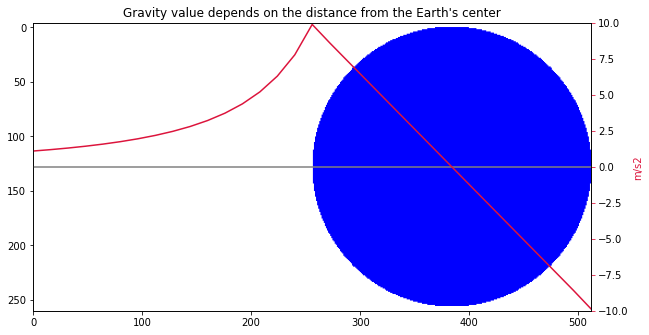

In [5]:
Space_image = np.zeros((IMG_Y,IMG_X,4))

for px in range(0,IMG_X):
    x = px*SPACE_X/IMG_X-SPACE_X+EARTH_RADIUS
    
    for py in range(0,IMG_Y):
        y = (IMG_Y/2 - py)*SPACE_Y/IMG_Y
        
        if x*x+y*y<EARTH_RADIUS*EARTH_RADIUS:
            Space_image[py,px] = colors.to_rgba('blue')
        else:
            Space_image[py,px] = colors.to_rgba('white')
    
fig, ax1 = plt.subplots(figsize=(10,5.3))
plt.title("Gravity value depends on the distance from the Earth's center")
ax1.set_xlim([0,IMG_X])
ax1.set_ylim([IMG_Y,0])
imgplot = ax1.imshow(Space_image)

color2 ='crimson'
ax2 = ax1.twinx();
ax2.set_xlim([0,IMG_X])
ax2.set_ylim([-10,10])
ax2.axhline(0, color='gray')
ax2.plot(npoints,gravities,color = color2)
ax2.set_ylabel('m/s2', color = color2);
ax2.tick_params(axis='y',color = color2);
